In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
# Define paths for your dataset
train_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\train'
test_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\test'

In [3]:
# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here
    fill_mode='nearest'
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical'
)

Found 39 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [5]:
# Build a neural network model
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(units=512, activation='relu'),
    Dropout(0.2),
    Dense(units=256, activation='relu'),
    Dropout(0.2),
    Dense(units=3, activation='softmax')
])

In [6]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 512)               25166336  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,298,435
Trainable params: 25,298,435
No

In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Fit the model for training 
history = model.fit(train_generator, epochs=50,validation_data=validation_generator)

Epoch 1/50
5/5 [==============================] - 3s 121ms/step - loss: 3.0404 - accuracy: 0.3077 - val_loss: 1.5332 - val_accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 0s 27ms/step - loss: 2.1989 - accuracy: 0.4615 - val_loss: 3.5702 - val_accuracy: 0.3333
Epoch 3/50
5/5 [==============================] - 0s 24ms/step - loss: 3.6753 - accuracy: 0.3590 - val_loss: 1.6660 - val_accuracy: 0.3333
Epoch 4/50
5/5 [==============================] - 0s 27ms/step - loss: 4.4838 - accuracy: 0.3077 - val_loss: 1.5510 - val_accuracy: 0.3333
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 2.7003 - accuracy: 0.3590 - val_loss: 2.6729 - val_accuracy: 0.3333
Epoch 6/50
5/5 [==============================] - 0s 27ms/step - loss: 2.9867 - accuracy: 0.2308 - val_loss: 0.8024 - val_accuracy: 0.5556
Epoch 7/50
5/5 [==============================] - 0s 27ms/step - loss: 1.6261 - accuracy: 0.5128 - val_loss: 1.4401 - val_accuracy: 0.3333
Epoch 8/50
5/5 [==========

In [9]:
# Save the trained model
model.save('cat_dog_face_model.h5')

Text(0, 0.5, 'Accuracy')

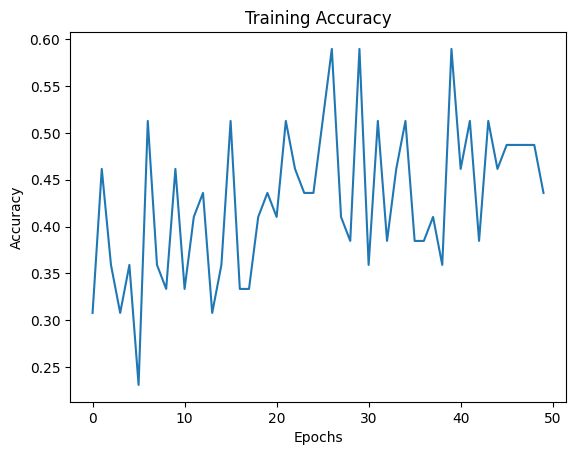

In [10]:
# Plot the training and validation Accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

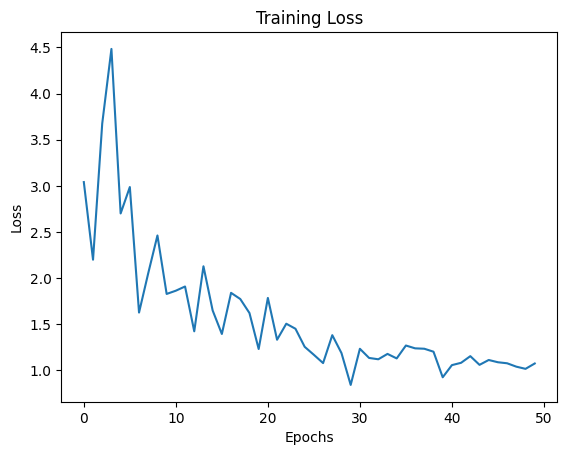

In [11]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [12]:
# Load the trained model
model = load_model('cat_dog_face_model.h5')  # Replace with the path to your trained model file

In [13]:
# Make predictions on the test data
predictions = model.predict(test_generator)
# 'predictions' will contain the predicted probabilities for each class for each sample in the test data

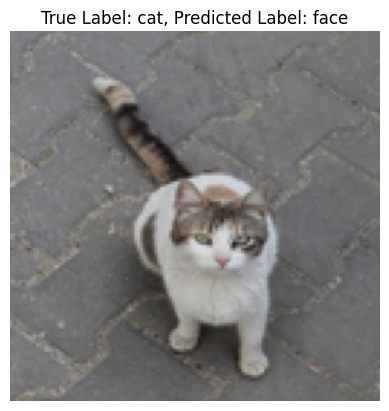

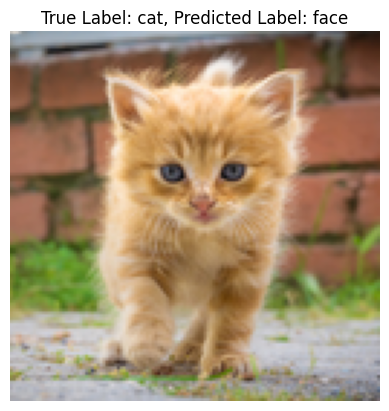

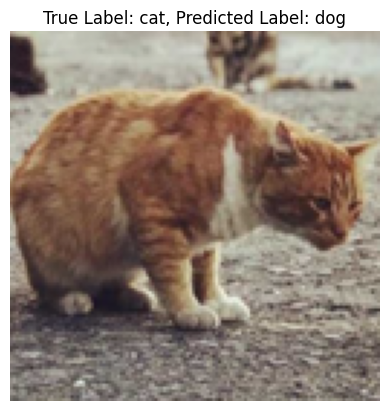

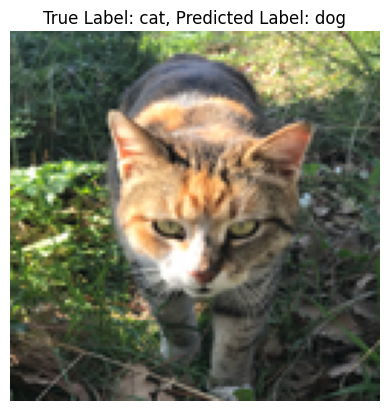

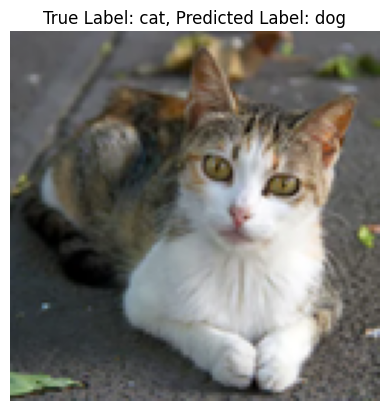

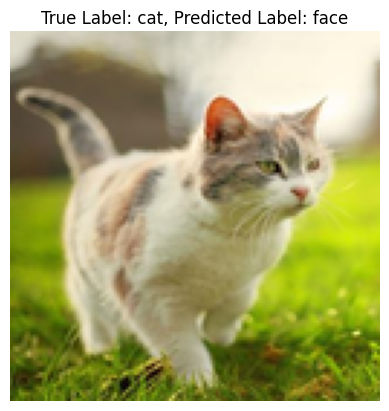

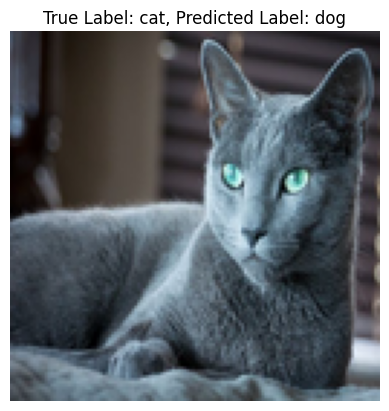

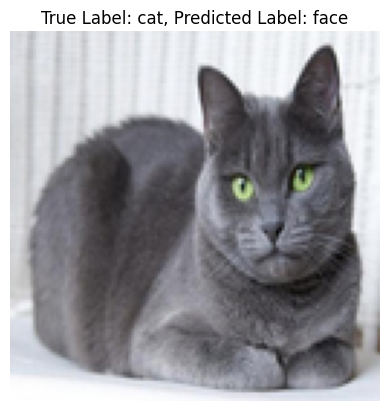

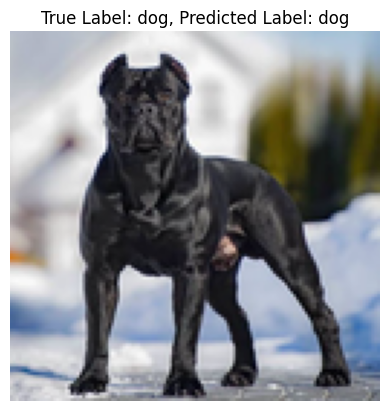

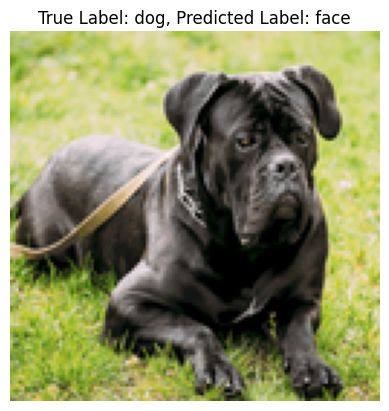

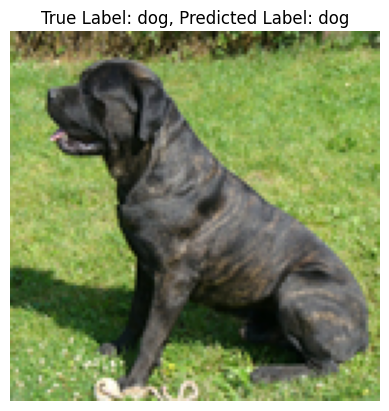

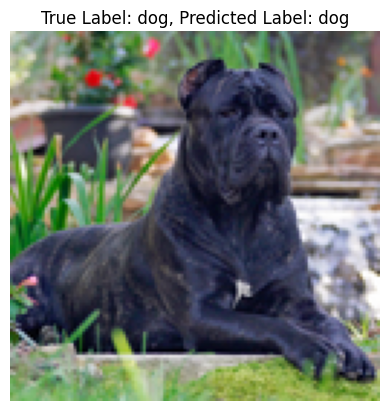

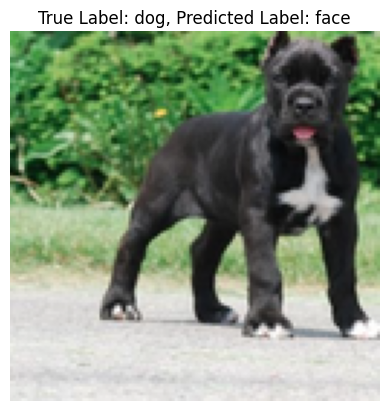

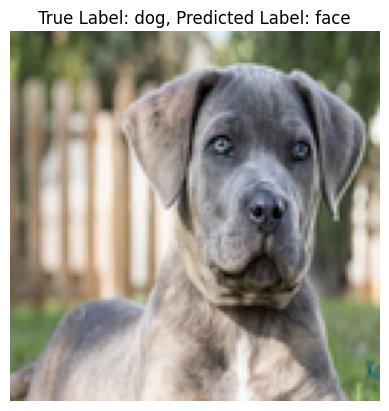

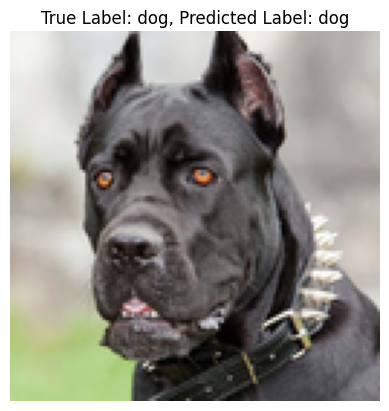

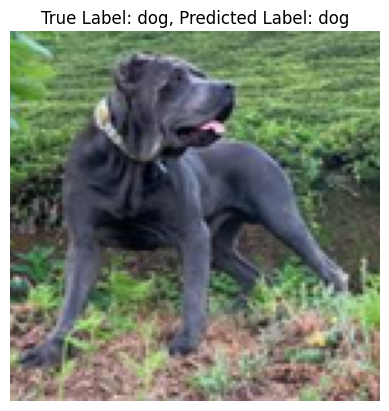

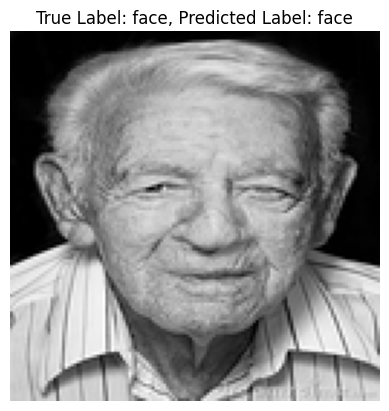

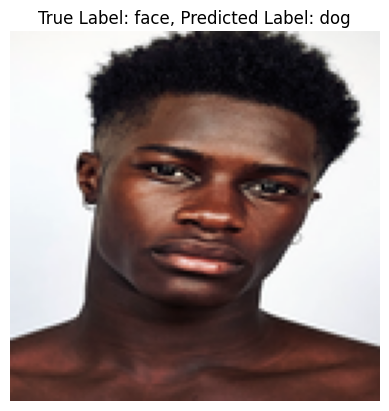

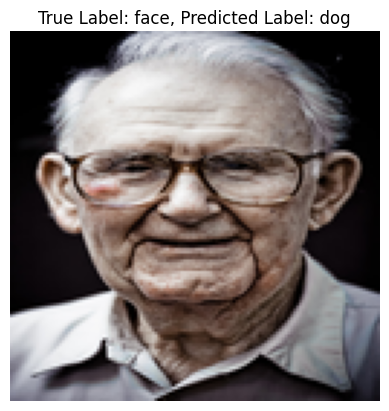

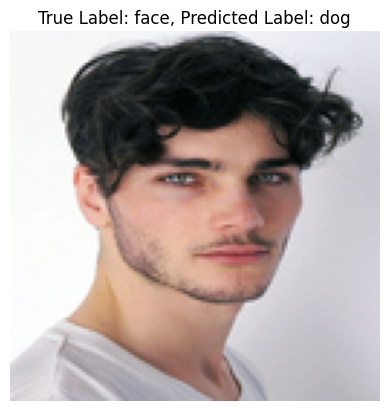

In [14]:
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(20):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
